In [2]:
import dask.dataframe as dd
import pandas as pd

In [3]:
pdf = pd.DataFrame(
    {"num1": [1, 2, 3, 4], "num2": [7, 8, 9, 10]},
)
df = dd.from_pandas(pdf, npartitions=2)

In [6]:
df.to_csv("./tmp/csv_simple_2.csv")

['/Users/rpelgrim/Documents/git/rrpelgrim-coiled-personal/./tmp/csv_simple_2.csv/0.part',
 '/Users/rpelgrim/Documents/git/rrpelgrim-coiled-personal/./tmp/csv_simple_2.csv/1.part']

In [7]:
df

,num1,num2
npartitions=2,,
0,int64,int64
2,...,...
3,...,...


In [8]:
ddf = df

In [9]:
ddf.head(10)

/Users/rpelgrim/mambaforge/envs/coiled-base/lib/python3.9/site-packages/dask/dataframe/core.py:6955: UserWarning: Insufficient elements for `head`. 10 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


,num1,num2
0,1,7
1,2,8


In [10]:
import dask

In [11]:
ddf = dask.datasets.timeseries("1990")

In [13]:
ddf.head(3)

,id,name,x,y
timestamp,,,,
1990-01-01 00:00:00,1058,Jerry,-0.872128,0.337763
1990-01-01 00:00:01,1009,Edith,-0.793868,0.298295
1990-01-01 00:00:02,986,Zelda,-0.597289,-0.665640


In [14]:
df.compute()

,num1,num2
0,1,7
1,2,8
2,3,9
3,4,10


## Basic Operations

In [17]:
ddf.columns

Index(['id', 'name', 'x', 'y'], dtype='object')

In [18]:
ddf.dtypes

id        int64
name     object
x       float64
y       float64
dtype: object

In [19]:
ddf.npartitions

3682

In [16]:
ddf.describe().compute()

,id,x,y
count,3.181248e+08,3.181248e+08,3.181248e+08
mean,9.999992e+02,-1.471713e-05,-3.860613e-05
std,3.162251e+01,5.773323e-01,5.773433e-01
min,8.270000e+02,-1.000000e+00,-1.000000e+00
25%,9.790000e+02,-4.903564e-01,-4.910447e-01
50%,1.000000e+03,1.274976e-02,1.187037e-02
75%,1.022000e+03,5.118671e-01,5.109812e-01
max,1.189000e+03,1.000000e+00,1.000000e+00


In [20]:
ddf.partitions[0]

,id,name,x,y
npartitions=1,,,,
1990-01-01,int64,object,float64,float64
1990-01-02,...,...,...,...


<AxesSubplot:>

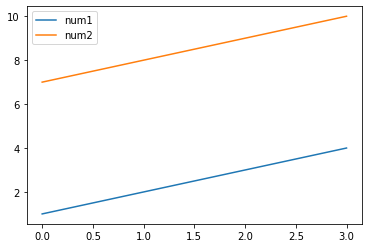

In [22]:
pdf.plot()

In [25]:
ddf.head()

,id,name,x,y
timestamp,,,,
1990-01-01 00:00:00,1058,Jerry,-0.872128,0.337763
1990-01-01 00:00:01,1009,Edith,-0.793868,0.298295
1990-01-01 00:00:02,986,Zelda,-0.597289,-0.665640
1990-01-01 00:00:03,997,Yvonne,0.413854,-0.411249
1990-01-01 00:00:04,998,Zelda,-0.633763,-0.175111


In [27]:
ddf.loc["1990-01-01"].compute()

,id,name,x,y
timestamp,,,,
1990-01-01 00:00:00,1058,Jerry,-0.872128,0.337763
1990-01-01 00:00:01,1009,Edith,-0.793868,0.298295
1990-01-01 00:00:02,986,Zelda,-0.597289,-0.665640
1990-01-01 00:00:03,997,Yvonne,0.413854,-0.411249
1990-01-01 00:00:04,998,Zelda,-0.633763,-0.175111
...,...,...,...,...
1990-01-01 23:59:55,994,Dan,0.757516,0.250908
1990-01-01 23:59:56,1042,Ray,-0.550882,-0.194467
1990-01-01 23:59:57,946,Hannah,0.647164,-0.779678


In [31]:
ddf.iloc[:, 1].head()

timestamp
1990-01-01 00:00:00     Jerry
1990-01-01 00:00:01     Edith
1990-01-01 00:00:02     Zelda
1990-01-01 00:00:03    Yvonne
1990-01-01 00:00:04     Zelda
Freq: S, Name: name, dtype: object

In [36]:
ddf.groupby("name").x.mean().compute()

name
Alice       5.552947e-06
Bob        -6.741587e-05
Charlie    -1.419766e-04
Dan        -2.422360e-05
Edith       9.368941e-05
Frank       2.356334e-04
George     -1.699949e-04
Hannah      1.787516e-04
Ingrid     -6.196565e-05
Jerry      -1.317566e-04
Kevin       1.525985e-04
Laura      -1.015165e-04
Michael     2.522278e-04
Norbert     8.567085e-05
Oliver      3.262805e-07
Patricia   -1.498108e-04
Quinn       3.451415e-05
Ray        -9.936520e-05
Sarah       1.753102e-07
Tim         7.826044e-05
Ursula     -8.692884e-05
Victor     -1.001067e-04
Wendy      -2.060796e-04
Xavier     -2.162018e-04
Yvonne     -1.463105e-04
Zelda       2.038136e-04
Name: x, dtype: float64